In [2348]:
import numpy as np

In [2349]:
import pandas as pd
import matplotlib.pyplot as plt

In [2350]:
dataset = pd.read_csv('linear_regression_dataset.csv')

In [2351]:
dataset.head()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754


In [2352]:

dataset.shape

(500, 6)

In [2353]:
# dataset.info()

In [2354]:
dataset.isnull().sum()

AGE       0
FEMALE    0
LOS       0
RACE      1
TOTCHG    0
APRDRG    0
dtype: int64

In [2355]:
dataset['RACE']=dataset['RACE'].replace(np.nan,0)

In [2356]:
dataset.isnull().sum()

AGE       0
FEMALE    0
LOS       0
RACE      0
TOTCHG    0
APRDRG    0
dtype: int64

In [2357]:
titles=list(dataset.columns)
titles

['AGE', 'FEMALE', 'LOS', 'RACE', 'TOTCHG', 'APRDRG']

In [2358]:
titles[4],titles[5]=titles[5],titles[4]
titles

['AGE', 'FEMALE', 'LOS', 'RACE', 'APRDRG', 'TOTCHG']

In [2359]:
dataset=dataset[titles]
dataset

,AGE,FEMALE,LOS,RACE,APRDRG,TOTCHG
0,17,1,2,1.0,560,2660
1,17,0,2,1.0,753,1689
2,17,1,7,1.0,930,20060
3,17,1,1,1.0,758,736
4,17,1,1,1.0,754,1194
...,...,...,...,...,...,...
495,0,1,6,1.0,636,5881
496,0,1,2,1.0,640,1171
497,0,1,2,1.0,640,1171
498,0,1,2,1.0,640,1086


In [2360]:
new_dataset=dataset.loc[0:350,:]
y_train=dataset.iloc[0:350,5]

In [2361]:
print(y_train.shape)
y_train

(350,)


0       2660
1       1689
2      20060
3        736
4       1194
       ...  
345     1381
346     2877
347     2805
348     4412
349    11125
Name: TOTCHG, Length: 350, dtype: int64

In [2362]:
y_test=dataset.iloc[350:500,5]

In [2363]:
y_test.shape

(150,)

In [2364]:
dataset=(dataset-dataset.mean())/dataset.std()
dataset

,AGE,FEMALE,LOS,RACE,APRDRG,TOTCHG
0,1.714374,0.975304,-0.246173,-0.147148,-0.316068,-0.029418
1,1.714374,-1.023270,-0.246173,-0.147148,0.766280,-0.279134
2,1.714374,0.975304,1.240380,-0.147148,1.758899,4.445422
3,1.714374,0.975304,-0.543484,-0.147148,0.794320,-0.524222
4,1.714374,0.975304,-0.543484,-0.147148,0.771888,-0.406436
...,...,...,...,...,...,...
495,-0.731854,0.975304,0.943069,-0.147148,0.110142,0.798942
496,-0.731854,0.975304,-0.246173,-0.147148,0.132574,-0.412351
497,-0.731854,0.975304,-0.246173,-0.147148,0.132574,-0.412351
498,-0.731854,0.975304,-0.246173,-0.147148,0.132574,-0.434211


In [2365]:
x_train=dataset.iloc[0:350,0:5]


In [2366]:
x_train.shape


(350, 5)

In [2367]:
x_test=dataset.iloc[350:500,0:5]
x_test.shape

(150, 5)

In [2368]:
x=x_train.values
print(x)
x.shape

[[ 1.71437426  0.97530444 -0.24617312 -0.1471483  -0.31606803]
 [ 1.71437426 -1.02327023 -0.24617312 -0.1471483   0.7662799 ]
 [ 1.71437426  0.97530444  1.24037955 -0.1471483   1.75889949]
 ...
 [-0.73185391 -1.02327023 -0.54348366 -0.1471483  -2.6826526 ]
 [-0.73185391 -1.02327023 -0.24617312 -0.1471483  -2.6826526 ]
 [ 1.42658271  0.97530444  0.64575848 -0.1471483   0.69337563]]


(350, 5)

In [2369]:
ones=np.ones([len(x),1])

x=np.concatenate((ones,x,),axis=1)

print(x)
print(x.shape)

[[ 1.          1.71437426  0.97530444 -0.24617312 -0.1471483  -0.31606803]
 [ 1.          1.71437426 -1.02327023 -0.24617312 -0.1471483   0.7662799 ]
 [ 1.          1.71437426  0.97530444  1.24037955 -0.1471483   1.75889949]
 ...
 [ 1.         -0.73185391 -1.02327023 -0.54348366 -0.1471483  -2.6826526 ]
 [ 1.         -0.73185391 -1.02327023 -0.24617312 -0.1471483  -2.6826526 ]
 [ 1.          1.42658271  0.97530444  0.64575848 -0.1471483   0.69337563]]
(350, 6)


In [2370]:
epoch =1000
alpha = 0.05
loss = []
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [2371]:
(x@(theta.T)).shape

(350,)

In [2372]:

for i in range(epoch):
 
    theta = theta - ((alpha/len(x))*(((x.T)@((x @ (theta.T)) - y_train)).T))
   
  
    loss.insert(i,((1/(2*len(x)))*np.sum(np.square((x @ theta.T) - y_train))))

In [2373]:
print(theta)

[ 2771.39729427   972.90373265  -187.07478684  2573.87757327
  -148.10055758 -1328.19122993]


In [2374]:
l=np.array(theta[0])
print(l)

2771.3972942696173


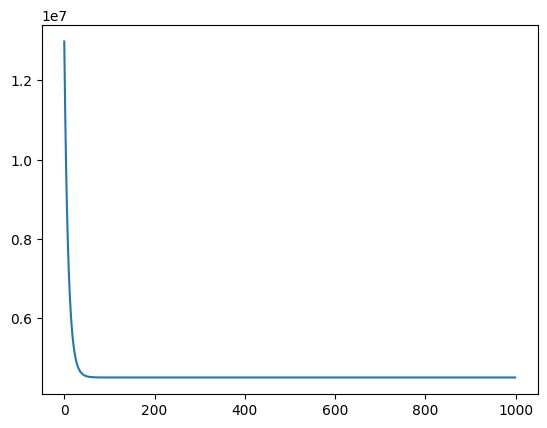

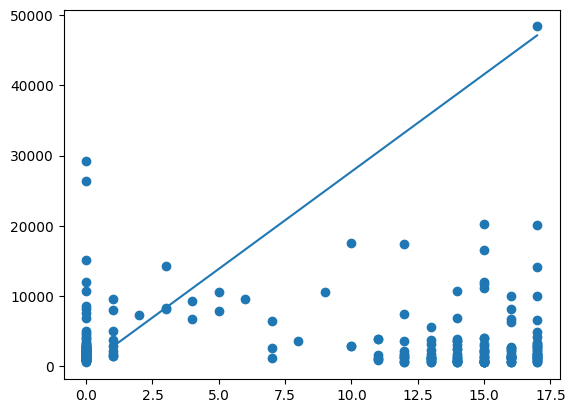

In [2375]:
z=[1,17]

line = l*z

plt.plot(range(epoch),loss)
plt.show()

plt.scatter(new_dataset.AGE,new_dataset.TOTCHG)
plt.plot(z,line)

In [2376]:
ones=np.ones([len(x_test),1])

x_test=np.concatenate((ones,x_test),axis=1)
x_test.shape

x_test

array([[ 1.        , -0.73185391,  0.97530444, -0.24617312, -0.1471483 ,
        -2.06016235],
       [ 1.        , -0.73185391, -1.02327023,  0.64575848, -0.1471483 ,
         0.1325736 ],
       [ 1.        , -0.73185391, -1.02327023,  0.05113741, -0.1471483 ,
         0.1325736 ],
       [ 1.        , -0.73185391,  0.97530444, -0.24617312, -0.1471483 ,
         0.1325736 ],
       [ 1.        , -0.73185391,  0.97530444, -0.24617312, -0.1471483 ,
         0.1325736 ],
       [ 1.        , -0.73185391,  0.97530444, -0.24617312, -0.1471483 ,
         0.1325736 ],
       [ 1.        , -0.73185391,  0.97530444, -0.24617312, -0.1471483 ,
         0.1325736 ],
       [ 1.        , -0.73185391,  0.97530444,  0.05113741, -0.1471483 ,
         0.1325736 ],
       [ 1.        , -0.58795813, -1.02327023, -0.24617312, -0.1471483 ,
        -2.06016235],
       [ 1.        ,  1.71437426,  0.97530444, -0.54348366, -0.1471483 ,
         0.7662799 ],
       [ 1.        , -0.73185391, -1.02327023, -0.

In [2377]:
predicted = x_test@theta

comp=pd.DataFrame({'Actual':y_test.T,'Predictated':predicted.T})
print(comp)

     Actual  Predictated
350    1818  4001.381850
351    4296  3758.614883
352    1887  2228.133046
353    1418  1089.009196
354    1136  1089.009196
..      ...          ...
495    5881  4179.766965
496    1171  1089.009196
497    1171  1089.009196
498    1086  1089.009196
499    4931  2993.373965

[150 rows x 2 columns]


In [2378]:
RSS=np.sum((y_test-predicted)**2)
TSS=np.sum((y_test-y_test.mean())**2)

accuracy=(1-(RSS/TSS))
print(accuracy*100)

72.15529072489764
